# `MDPGridworld-v0`:
This version of the 3×4 grid world is deterministic. The set-up for this problem is based from this [blog post](https://goo.gl/GqkyzT).

## **States** or **Observation**
States are represented with scalar values in the range 0 to 11. Below is a diagram of the corresponding states.

    ```
    +---+---+---+---+
    | 0 | 1 | 2 | 3 |
    +---+---+---+---+
    | 4 | 5 | 6 | 7 |
    +---+---+---+---+
    | 8 | 9 | 10| 11|
    +---+---+---+---+

    +---+---+---+---+
    |   |   |   | G |   S - Starting state
    +---+---+---+---+   G - Goal
    |   | # |   | F |   F - Fire (very bad state)
    +---+---+---+---+   # - Wall
    | S |   |   |   |
    +---+---+---+---+
    ```

In [1]:
import gym
env = gym.make('MDPGridworld-v0')

In [2]:
print(env.observation_space) # give access to the Discrete state object
print(env.observation_space.n) # give access to scalar value representing range for the states

Discrete(12)
12


## **Actions**

Below are the scalar values for all possible actions in each non-terminal state. Agent keeps the same state when taking an action towards a wall.

    ```
    0 - North
    1 - South 
    2 - West 
    3 - East
    ```

In [3]:
print(env.action_space) # give access to the Discrete action object
print(env.action_space.n) # give access to scalar value representing range for the available actions

Discrete(4)
4


## **Rewards**
`r(3) = +100`, `r(7) = -100`. Other states has a reward of `-3`.

In [4]:
env.reset()
action = 0
next_state, reward, terminal, info = env.step(action)
# terminal is a return value of the environment's step method
print(next_state, reward, terminal, info)

4 -3 False {'prob': 1.0}


## **Transition Probabilities**
This provides you access to the transition probability, that taking action `a` at current state `s`, what is the probabilty of reaching next state `s'`

In [7]:
state = 8
action = 0 # North

## demo1: random action

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym

env = gym.make('MDPGridworld-v0')
N_EPSD=100
DISP_STEP=5
history=np.zeros(N_EPSD)

for i_episode in range(N_EPSD):
    obs = env.reset()
    for t in range(100):
        if i_episode % DISP_STEP == 0:
            env.render()
        # time.sleep(.5) # uncomment to slow down the simulation
        action = env.action_space.sample() # act randomly
        obs2, reward, terminal, _ = env.step(action)
        if terminal:
            env.render()
            print("Episode {} finished after {} timesteps".format(i_episode,t+1))
            history[i_episode]=t+1
            break

+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |

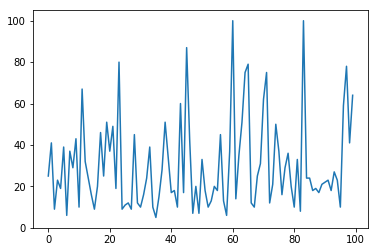

In [13]:
plt.ylim(0,history.max()+5)
plt.plot(history)

In [14]:
# from https://github.com/vmayoral/basic_reinforcement_learning/tree/master/tutorial1import random
import random

class QLearn:
    def __init__(self, actions, epsilon=0.1, alpha=0.2, gamma=0.9):
        self.q = {}

        self.epsilon = epsilon  # exploration constant
        self.alpha = alpha      # discount constant
        self.gamma = gamma
        self.actions = actions

    def getQ(self, state, action):
        return self.q.get((state, action), 0.0)
        # return self.q.get((state, action), 1.0)

    def learnQ(self, state, action, reward, value):
        '''
        Q-learning:        
            Q(s, a) += alpha * (reward + max(Q(s')) - Q(s,a))
        '''
        oldq = self.q.get((state, action), None)
        if oldq is None:
            self.q[(state, action)] = reward
        else:
            self.q[(state, action)] = oldq + self.alpha * (value - oldq)

    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            # In case there're several state-action max values 
            # we select a random one among them
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                i = random.choice(best)
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gym

env = gym.make('MDPGridworld-v0')
N_EPSD=100
DISP_STEP=5
history=np.zeros(N_EPSD)

rl=QLearn(actions=list(range(env.action_space.n)),
                                alpha=0.1, gamma=0.9, epsilon=0.1)

for i_episode in range(N_EPSD):
    obs = env.reset()
    for t in range(100):
        if i_episode % DISP_STEP == 0:
            env.render()
        # time.sleep(.5) # uncomment to slow down the simulation
        action = rl.chooseAction(obs) # act randomly
        obs2, reward, terminal, _ = env.step(action)
        rl.learn(obs, action, reward, obs2)
        if terminal:
            env.render()
            print("Episode finished after {} timesteps".format(t+1))
            history[i_episode]=t+1
            break
        obs = obs2

+----+
|   G|
| | F|
|S   |
+----+

+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (North)
+----+
|   G|
| | F|
|S   |
+----+
  (East)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+----+
  (South)
+----+
|   G|
| | F|
|S   |
+----+
  (West)
+----+
|   G|
| | F|
|S   |
+---

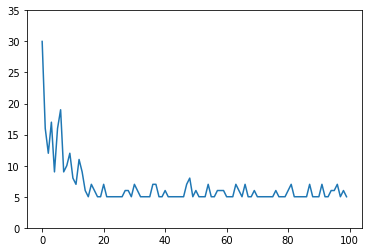

In [16]:
plt.ylim(0,history.max()+5)
plt.plot(history)

In [17]:
print(rl.q)

{(0, 1): 7.244265908629764, (9, 3): -2.9050414857299995, (9, 1): -4.3232686527, (11, 2): -3.35505, (8, 0): 54.25723514751741, (9, 0): -4.56956354073, (2, 1): 9.432603309480001, (6, 0): 58.7570463519, (11, 0): -100, (0, 0): -0.029665225475560053, (2, 3): 100.0, (10, 1): -3.27, (6, 2): -3, (4, 2): 3.886760500640488, (0, 3): 75.24370158799077, (10, 3): -3.513, (1, 0): -3, (4, 0): 64.4557219172711, (1, 2): 9.857184838485258, (8, 3): -5.7177755648862645, (2, 0): 21.39, (8, 1): -5.803668665900804, (6, 1): -3, (11, 3): -3.27, (8, 2): -0.6741364271811419, (0, 2): 26.44708498663658, (6, 3): -100, (9, 2): -4.59333068731923, (11, 1): -3.5373, (4, 3): 5.911435625761266, (2, 2): 4.827815254994714, (1, 3): 86.99382963480826, (10, 0): 9.969426429, (4, 1): -2.001128475309785, (1, 1): 28.516511120346824, (10, 2): -3.27}


In [18]:
for s in range(env.observation_space.n):
    q = [rl.getQ(s, a) for a in range(env.action_space.n)]
    
    print(max(q))
    print(q.index(max(q)))

75.24370158799077
3
86.99382963480826
3
100.0
3
0.0
0
64.4557219172711
0
0.0
0
58.7570463519
0
0.0
0
54.25723514751741
0
-2.9050414857299995
3
9.969426429
0
-3.27
3


In [19]:
Q = np.array([[rl.getQ(s, a) for a in rl.actions] for s in range(env.observation_space.n)])
print(Q)

argmaxQ=Q.argmax(axis=1)
print(argmaxQ)

print("+----+")
print("|",end='')
for s in range(env.observation_space.n):
    print("{}".format(["^","v","<",">"][argmaxQ[s]]), end='')
    if (s+1) % 4 == 0:
        print("|")
        if s!= env.observation_space.n - 1:
            print("|",end='')

print("+----+")

[[-2.96652255e-02  7.24426591e+00  2.64470850e+01  7.52437016e+01]
 [-3.00000000e+00  2.85165111e+01  9.85718484e+00  8.69938296e+01]
 [ 2.13900000e+01  9.43260331e+00  4.82781525e+00  1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.44557219e+01 -2.00112848e+00  3.88676050e+00  5.91143563e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.87570464e+01 -3.00000000e+00 -3.00000000e+00 -1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.42572351e+01 -5.80366867e+00 -6.74136427e-01 -5.71777556e+00]
 [-4.56956354e+00 -4.32326865e+00 -4.59333069e+00 -2.90504149e+00]
 [ 9.96942643e+00 -3.27000000e+00 -3.27000000e+00 -3.51300000e+00]
 [-1.00000000e+02 -3.53730000e+00 -3.35505000e+00 -3.27000000e+00]]
[3 3 3 0 0 0 0 0 0 3 0 3]
+----+
|>>>^|
|^^^^|
|^>^>|
+----+
